## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Requirements

In [2]:
!pip install openimages numpy pandas scikit-learn opencv-python bing-image-downloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.4
    Uninstalling urllib3-2.0.4:
      Successfully uninstalled urllib3-2.0.4


## Old code

In [ ]:
import os
import random
import cv2
import numpy as np
# from openimages.download import download_images
from bing_image_downloader import downloader

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def load_images_from_folder(folder_path, num_images):
    images = []
    random_files = random.sample(os.listdir(folder_path), num_images)
    for filename in random_files:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

def test_model(model, image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Resize the image to match the input size during training
        img = img.reshape(1, -1) / 255.0  # Flatten and normalize the image
        prediction = model.predict(img)
        if prediction[0] == 1:
            return "calisthenics_spot"
        else:
            return "not_calisthenics_spot"
    else:
        return "Invalid image path or format"

# Set the paths for calisthenics_spot and not_calisthenics_spot folders
calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/calisthenics_spot"
not_calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/random_images_dataset"

# Load images from the calisthenics_spot folder
num_calisthenics_images = 6552
calisthenics_images = load_images_from_folder(calisthenics_folder, num_calisthenics_images)

# # Download random images from the Open Images V6 dataset for the not_calisthenics_spot class
num_not_calisthenics_images = 6552
# class_label = "not_calisthenics_spot"
# # download_images(limit=num_not_calisthenics_images, annotations=class_label,
# #                 folder=not_calisthenics_folder)
# downloader.download(query='', limit=num_not_calisthenics_images, output_dir=not_calisthenics_folder, adult_filter_off=False, force_replace=False, timeout=60, verbose=True)

# Load images from the not_calisthenics_spot folder
not_calisthenics_images = load_images_from_folder(not_calisthenics_folder, num_not_calisthenics_images)

# Create labels for the data
calisthenics_labels = np.ones(num_calisthenics_images)
not_calisthenics_labels = np.zeros(num_not_calisthenics_images)

# Combine the data and labels for the model
X = np.array(calisthenics_images + not_calisthenics_images)
y = np.concatenate((calisthenics_labels, not_calisthenics_labels))

# Flatten and normalize the images
X = X.reshape(X.shape[0], -1)
X = X.astype('object') / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-4-884b39536fcd>:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(calisthenics_images + not_calisthenics_images)


## Imports

In [3]:
import os
import random
import cv2
import numpy as np
# from openimages.download import download_images
from bing_image_downloader import downloader

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Utility Functions

In [4]:
def load_images_from_folder(folder_path, num_images):
    images = []
    random_files = random.sample(os.listdir(folder_path), num_images)
    for filename in random_files:
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images

def test_model(model, image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, (64, 64))  # Resize the image to match the input size during training
        img = img.reshape(1, -1) / 255.0  # Flatten and normalize the image
        prediction = model.predict(img)
        if prediction[0] == 1:
            return "calisthenics_spot"
        else:
            return "not_calisthenics_spot"
    else:
        return "Invalid image path or format"


def resize_images_by_percentage(image_folder, percentage, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    resized_images = []

    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            new_width = int(img.shape[1] - (img.shape[1] * percentage))
            new_height = int(img.shape[0] - (img.shape[0] * percentage))
            resized_img = cv2.resize(img, (new_width, new_height))
            resized_images.append(resized_img)
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_img)

    return np.array(resized_images)

## Resize calisthenics spots

In [ ]:
# Set the paths for calisthenics_spot and not_calisthenics_spot folders
calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/calisthenics_spot"
not_calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/random_images_dataset"

# Load images from the calisthenics_spot folder
num_calisthenics_images = 6552
calisthenics_images = load_images_from_folder(calisthenics_folder, num_calisthenics_images)

# Specify the percentage by which to resize the images
resize_percentage = 0.8095238

# Resize calisthenics_spot images by the specified percentage
resized_calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/resized_calisthenics_spotsss"
resized_calisthenics_images = resize_images_by_percentage(calisthenics_folder, resize_percentage, resized_calisthenics_folder)

# # Download random images from the Open Images V6 dataset for the not_calisthenics_spot class
num_not_calisthenics_images = 6552
# class_label = "not_calisthenics_spot"
# # download_images(limit=num_not_calisthenics_images, annotations=class_label,
# #                 folder=not_calisthenics_folder)
# downloader.download(query='', limit=num_not_calisthenics_images, output_dir=not_calisthenics_folder, adult_filter_off=False, force_replace=False, timeout=60, verbose=True)

# Load images from the not_calisthenics_spot folder
not_calisthenics_images = load_images_from_folder(not_calisthenics_folder, num_not_calisthenics_images)

<ipython-input-9-eb366fed2886>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(resized_images)


## Load images from folder


In [5]:
# Set the paths for calisthenics_spot and not_calisthenics_spot folders
calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/resized_calisthenics_spotsss"
not_calisthenics_folder = "/content/drive/Othercomputers/Meu computador/5-periodo/method/random_images_dataset"

# Load images from the calisthenics_spot folder
num_calisthenics_images = 6552
calisthenics_images = load_images_from_folder(calisthenics_folder, num_calisthenics_images)

# Load images from the not calisthenics_spot folder
num_not_calisthenics_images = 6552
not_calisthenics_images = load_images_from_folder(not_calisthenics_folder, num_not_calisthenics_images)

## Load data

In [10]:
# Create labels for the data
calisthenics_labels = np.ones(shape=num_calisthenics_images, dtype=int)
not_calisthenics_labels = np.zeros(shape=num_not_calisthenics_images, dtype=int)

# Combine the data and labels for the model
X = np.array(object=(calisthenics_images + not_calisthenics_images), dtype=object)
y = np.concatenate((calisthenics_labels, not_calisthenics_labels))

# Resize the images to a consistent size (e.g., 64x64)
resized_images = [cv2.resize(image, (64, 64)) for image in X]

# Normalize the pixel values of each image
normalized_images = [image.astype('float32') / 255.0 for image in resized_images]

# Convert the list of images to a NumPy array
X_normalized = np.array(normalized_images)

# Reshape the images to match the flattened size
num_samples, height, width, channels = X_normalized.shape
X_flattened = X_normalized.reshape(num_samples, -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

## Train the model

In [11]:
# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

## Save model

In [12]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

# ... Load and preprocess data, train SVM model as shown before ...

# Save the trained SVM model
model_filename = '/content/drive/Othercomputers/Meu computador/5-periodo/method/svm_model_right.pkl'
joblib.dump(svm_classifier, model_filename)

['/content/drive/Othercomputers/Meu computador/5-periodo/method/svm_model_right.pkl']

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6879053796260969


## Import model

In [16]:
model_filename = '/content/drive/Othercomputers/Meu computador/5-periodo/method/svm_model_right.pkl'

# Load the trained SVM model
loaded_model = joblib.load(model_filename)

## Test model with real data

In [ ]:
def test_model(model, image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load the image.")
        return

    # Preprocess the image: resize and normalize
    resized_img = cv2.resize(img, (64, 64))
    normalized_img = resized_img.astype('float32') / 255.0
    flattened_img = normalized_img.reshape(1, -1)  # Reshape for prediction

    # Make predictions using the loaded model
    prediction = model.predict(flattened_img)

    if prediction[0] == 1:
        print("The image is a calisthenics_spot.")
    else:
        print("The image is not a calisthenics_spot.")

# Path to the image you want to test
test_image_path = "/content/drive/Othercomputers/Meu computador/5-periodo/method/calisthenics_spot/teste/epa.png"  # Replace with your test image path

# Test the model using the loaded SVM model
test_model(loaded_model, test_image_path)

In [ ]:
import os
import cv2
import numpy as np

def calculate_average_image_size(image_folder):
    total_width = 0
    total_height = 0
    num_images = 0

    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            total_width += img.shape[1]
            total_height += img.shape[0]
            num_images += 1

    average_width = total_width // num_images
    average_height = total_height // num_images

    return average_width, average_height


In [ ]:
def resize_images(image_folder, average_width, average_height, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            width = img.shape[1]
            height = img.shape[0]

            target_width = width * (average_width / width)
            target_height = height * (average_height / height)

            resized_img = cv2.resize(img, (target_width, target_height))
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, resized_img)

# Set the paths for calisthenics_spot and not_calisthenics_spot folders
calisthenics_folder = "./spots/calisthenics_spot"
not_calisthenics_folder = "./not_calisthenics_spot"

# Calculate the average size of not_calisthenics_spot images
average_width, average_height = calculate_average_image_size(not_calisthenics_folder)

# Resize calisthenics_spot images to match the average size
resized_calisthenics_folder = "./resized_calisthenics_spot"
resize_images(calisthenics_folder, average_width, average_height, resized_calisthenics_folder)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Load the test data and corresponding labels
X_test, y_test = load_test_data()  # Load your test data here

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification report (precision, recall, f1-score, support)
class_report = classification_report(y_test, y_pred, target_names=['not_calisthenics_spot', 'calisthenics_spot'])

# Extract metrics from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

# Calculate metrics
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results and write in your thesis
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Write your interpretation and analysis based on the metrics in your thesis results section


## Results

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Load the test data and corresponding labels
# X_test, y_test = load_test_data()  # Load your test data here

# Predict using the loaded model
y_pred = loaded_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification report (precision, recall, f1-score, support)
class_report = classification_report(y_test, y_pred, target_names=['not_calisthenics_spot', 'calisthenics_spot'])

# Extract metrics from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()
print("TN", true_negatives, "FP", false_positives, "FN", false_negatives, "TP", true_positives, "\n")

# Calculate metrics
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results and write in your thesis
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Write your interpretation and analysis based on the metrics in your thesis results section


TN 906 FP 414 FN 404 TP 897 

Confusion Matrix:
 [[906 414]
 [404 897]]

Classification Report:
                        precision    recall  f1-score   support

not_calisthenics_spot       0.69      0.69      0.69      1320
    calisthenics_spot       0.68      0.69      0.69      1301

             accuracy                           0.69      2621
            macro avg       0.69      0.69      0.69      2621
         weighted avg       0.69      0.69      0.69      2621


Accuracy: 0.6879053796260969
Precision: 0.6842105263157895
Recall: 0.6894696387394312
F1-Score: 0.6868300153139356


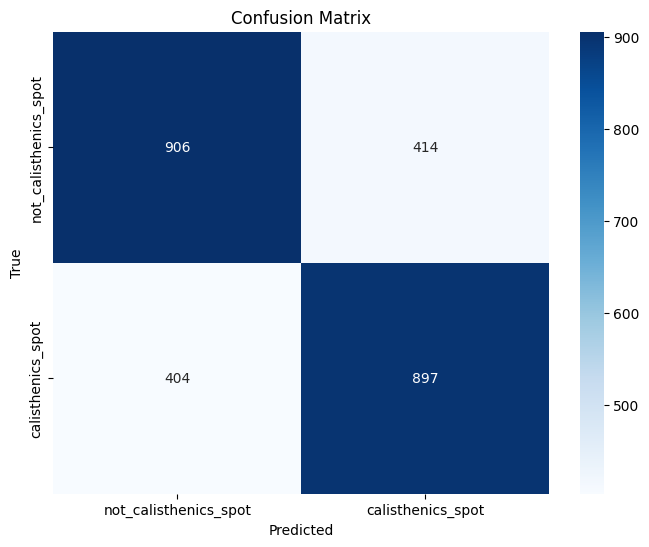

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

labels = ['not_calisthenics_spot', 'calisthenics_spot']
plot_confusion_matrix(conf_matrix, labels)


In [22]:
!pip install scikit-plot

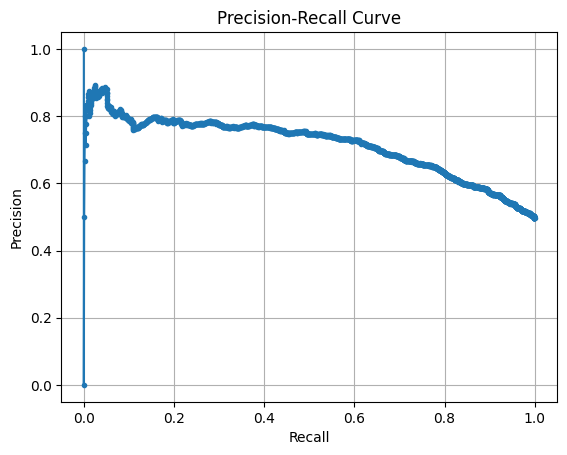

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, loaded_model.decision_function(X_test))

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()



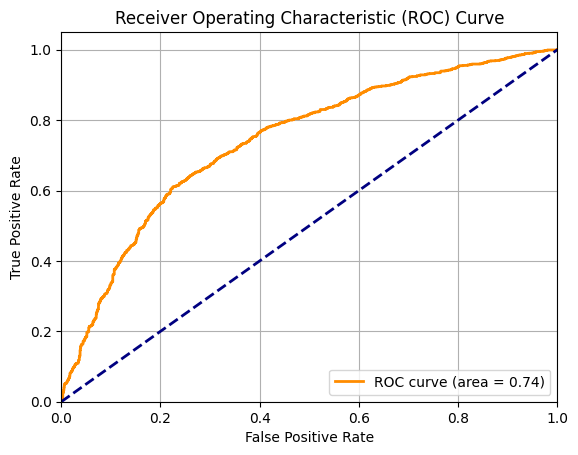

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate false positive rate (FPR) and true positive rate (TPR) values
fpr, tpr, thresholds = roc_curve(y_test, loaded_model.decision_function(X_test))

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()